In [1]:
import h5py

file_path = 'data.h5'

with h5py.File(file_path, 'r') as file:
    print("Subgroups:")
    print("----------")
    for subgroup in file.keys():
        print(subgroup)

    print("\nKeys:")
    print("-----")
    file.visit(lambda name: print(name) if isinstance(file[name], h5py.Dataset) else None)


Subgroups:
----------
Cube

Keys:
-----
Cube/Angle
Cube/GratingID
Cube/Images
Cube/TimeExposure
Cube/Timestamp
Cube/Wavelength


In [2]:
with h5py.File('data-sacrifial.h5', 'r+') as f:
        images = f['Cube']['Images']
        print(images.shape)

(101, 2048, 2048)


In [6]:
import numpy as np
with h5py.File('data-sacrifial.h5', 'r+') as f:
    data = f['Cube']['Images']
    # Find the index of the brightest hyperspectral image for each pixel
    brightest_indices = np.argmax(data, axis=0)

    # Count the occurrences of each index
    counts = np.bincount(brightest_indices.flatten())

    # Save the statistics to a file (e.g., CSV)
    output_file = 'statistics.csv'
    with open(output_file, 'w') as file:
        file.write('Hyperspectral Image Index,Count\n')
        for i, count in enumerate(counts):
            file.write(f'{i},{count}\n')

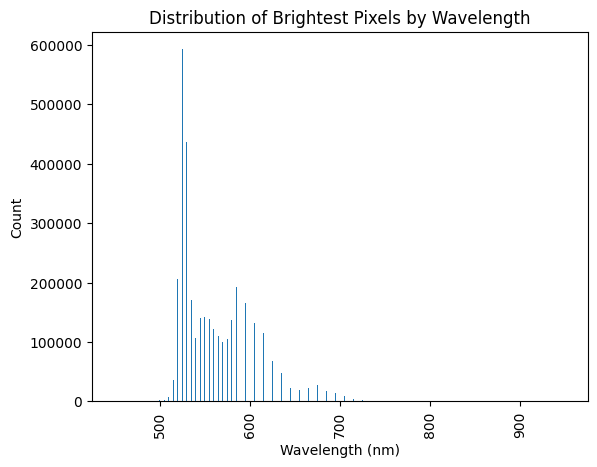

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the generated CSV file named 'statistics.csv'
csv_file = 'statistics.csv'

# Load the CSV file
df = pd.read_csv(csv_file)

# Convert column indices to wavelength values
wavelengths = list(range(450, 951, 5))

# Rename the column from 'Hyperspectral Image Index' to 'Wavelength (nm)'
df = df.rename(columns={'Hyperspectral Image Index': 'Wavelength (nm)'})

# Update the values in the 'Wavelength (nm)' column
df['Wavelength (nm)'] = wavelengths

# Plot the distribution
plt.bar(df['Wavelength (nm)'], df['Count'])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Count')
plt.title('Distribution of Brightest Pixels by Wavelength')
plt.xticks(rotation=90)
plt.show()